## Imports

In [72]:
import pandas as pd 
import numpy as np
from scipy.stats import chi2_contingency, ttest_ind

In [2]:
from libs.lib_graficos import *

## DataFrames

In [3]:
df = pd.read_csv("../data/SOT/unified_data.csv",sep = ";", encoding = "latin-1")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,customerID,Churn,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,Female,0,Yes,Yes,9,0002-ORFBO,No,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,Male,0,No,No,9,0003-MKNFE,No,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,Male,0,No,No,4,0004-TLHLJ,Yes,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Male,1,Yes,No,13,0011-IGKFF,Yes,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Female,1,Yes,No,3,0013-EXCHZ,Yes,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [4]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'customerID', 'Churn', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

## Funções

In [5]:
def get_frequency_table(df: pd.DataFrame, column: str):

    frequency = df[column].value_counts()
    pctg = df[column].value_counts(normalize=True) * 100

    freq_dist = pd.DataFrame({"Frequency": frequency, "Percentage": pctg})
    freq_dist["Percentage"] = freq_dist["Percentage"].map("{:.2f}%".format)

    return freq_dist

In [10]:
def get_bivariate_frequency_table(df: pd.DataFrame, column1: str, column2: str):

    freq_table = pd.crosstab(df[column1], df[column2], margins=True)
    freq_table = freq_table.div(freq_table["All"]["All"], axis=0) * 100

    freq_table = freq_table.applymap(lambda x: f"{x:.2f}%")
    freq_table.columns = freq_table.columns + " (%)"

    return freq_table

In [21]:
def get_chi_squared_test(df: pd.DataFrame, x: str, y: str):

    # Create a contingency table
    contingency_table = pd.crosstab(df[x], df[y])

    # Perform the chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-squared: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("Expected frequencies:")
    print(expected) ### It seams we was right

## Analysis

### Churn (Target)

In [32]:
get_frequency_table(df, "Churn") ### Our churn rate is about 26.6%. Maybe we'll do some SMOTE later

,Frequency,Percentage
Churn,,
No,5163,73.42%
Yes,1869,26.58%


### Gender

In [33]:
get_frequency_table(df, "gender") ### Gender equality

,Frequency,Percentage
gender,,
Male,3549,50.47%
Female,3483,49.53%


In [11]:
get_bivariate_frequency_table(df, "Churn", "gender") ### Doesn't seem to have a significant difference

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_2900\2200946644.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  freq_table = freq_table.applymap(lambda x: f"{x:.2f}%")


gender,Female (%),Male (%),All (%)
Churn,,,
No,36.18%,37.24%,73.42%
Yes,13.35%,13.23%,26.58%
All,49.53%,50.47%,100.00%


In [38]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df["Churn"], df["gender"])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected) ### It seams we was right

Chi-squared: 0.47545453727386294
P-value: 0.4904884707065509
Degrees of freedom: 1
Expected frequencies:
[[2557.27090444 2605.72909556]
 [ 925.72909556  943.27090444]]


### Senior Citzen

In [39]:
get_frequency_table(df, "SeniorCitizen") ### Only a few elders. Let's dive deep into that

,Frequency,Percentage
SeniorCitizen,,
0,5890,83.76%
1,1142,16.24%


In [13]:
df["SeniorCitizen"] = df["SeniorCitizen"].map({0: "No", 1: "Yes"})

In [14]:
get_bivariate_frequency_table(df, "Churn", "SeniorCitizen")

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_2900\2200946644.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  freq_table = freq_table.applymap(lambda x: f"{x:.2f}%")


SeniorCitizen,No (%),Yes (%),All (%)
Churn,,,
No,63.95%,9.47%,73.42%
Yes,19.81%,6.77%,26.58%
All,83.76%,16.24%,100.00%


In [19]:
get_bivariate_frequency_table(df[df["SeniorCitizen"] ==  "Yes"], "Churn", "SeniorCitizen") ### It does feel like elders are less likely to churn

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_2900\2200946644.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  freq_table = freq_table.applymap(lambda x: f"{x:.2f}%")


SeniorCitizen,Yes (%),All (%)
Churn,,
No,58.32%,58.32%
Yes,41.68%,41.68%
All,100.00%,100.00%


In [22]:
get_chi_squared_test(df, "Churn", "SeniorCitizen") ### Feels right

Chi-squared: 158.4408162893713
P-value: 2.4792557203954705e-36
Degrees of freedom: 1
Expected frequencies:
[[4324.52645051  838.47354949]
 [1565.47354949  303.52645051]]


In [24]:
### I wonder if most elders are male or female
get_frequency_table(df[df["SeniorCitizen"] == "Yes"], "gender") ## Seems equal, but let's check if churn rate is different

,Frequency,Percentage
gender,,
Male,574,50.26%
Female,568,49.74%


In [ ]:
get_bivariate_frequency_table(df[df["SeniorCitizen"] == "Yes"], "gender", "Churn") ### Doesn't seem to have a significant difference from the previous one

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_2900\2200946644.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  freq_table = freq_table.applymap(lambda x: f"{x:.2f}%")


Churn,No (%),Yes (%),All (%)
gender,,,
Female,28.72%,21.02%,49.74%
Male,29.60%,20.67%,50.26%
All,58.32%,41.68%,100.00%


### Partner

In [28]:
get_frequency_table(df, "Partner") ### Difference does not seem to be significant

,Frequency,Percentage
Partner,,
No,3639,51.75%
Yes,3393,48.25%


In [29]:
get_bivariate_frequency_table(df, "Partner", "Churn")  ### It does feel like people with partners are less likely to churn.
                                                        ### Does make enough sense

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_2900\2200946644.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  freq_table = freq_table.applymap(lambda x: f"{x:.2f}%")


Churn,No (%),Yes (%),All (%)
Partner,,,
No,34.68%,17.06%,51.75%
Yes,38.74%,9.51%,48.25%
All,73.42%,26.58%,100.00%


In [30]:
get_chi_squared_test(df, "Churn", "Partner") ### Feels right

Chi-squared: 157.50315146557506
P-value: 3.97379757451591e-36
Degrees of freedom: 1
Expected frequencies:
[[2671.8084471 2491.1915529]
 [ 967.1915529  901.8084471]]


### Tenure, Monthly Charges and Total Charges

It feels right to look the numerical values all together

In [38]:
df.describe()

,tenure,Charges.Monthly,Charges.Total,Churn_encoded
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,0.265785
std,24.545260,30.085974,2266.771362,0.441782
min,1.000000,18.250000,18.800000,0.000000
25%,9.000000,35.587500,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.862500,3794.737500,1.000000
max,72.000000,118.750000,8684.800000,1.000000


In [39]:
numerical_columns = ["tenure", "Charges.Monthly", "Charges.Total"]

In [ ]:
median_values = df[numerical_columns].median()
mode_values = df[numerical_columns].mode().iloc[0]
mean_values = df[numerical_columns].mean()

result = pd.DataFrame({"mean": mean_values,"median": median_values, "mode": mode_values})
result

### For this, i can already tell for>
# tenure - Mean > Median > Mode (Right Skewed)
# Charges.Monthly - median > mean > mode
# Charges.Total - Mean > Median > Mode (Right Skewed)

,mean,median,mode
tenure,32.421786,29.000,1.00
Charges.Monthly,64.798208,70.350,20.05
Charges.Total,2283.300441,1397.475,20.20


In [35]:
df["Churn_encoded"] = df["Churn"].map({"No": 0, "Yes": 1})

In [31]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'customerID', 'Churn', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [37]:
df[numerical_columns].corr()

,tenure,Charges.Monthly,Charges.Total,Churn_encoded
tenure,1.000000,0.246862,0.825880,-0.354049
Charges.Monthly,0.246862,1.000000,0.651065,0.192858
Charges.Total,0.825880,0.651065,1.000000,-0.199484
Churn_encoded,-0.354049,0.192858,-0.199484,1.000000


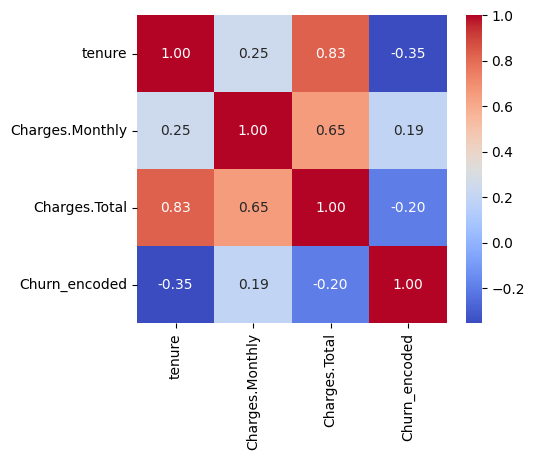

In [47]:
# Compute the correlation matrix
corr = df[numerical_columns + ["Churn_encoded"]].corr()

# Set up the matplotlib figure
plt.figure(figsize=(5, 4))

# Draw the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Show the plot
plt.show()

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_2900\3061839622.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Leonardo\AppData\Local\Temp\ipykernel_2900\3061839622.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Leonardo\AppData\Local\Temp\ipykernel_2900\3061839622.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


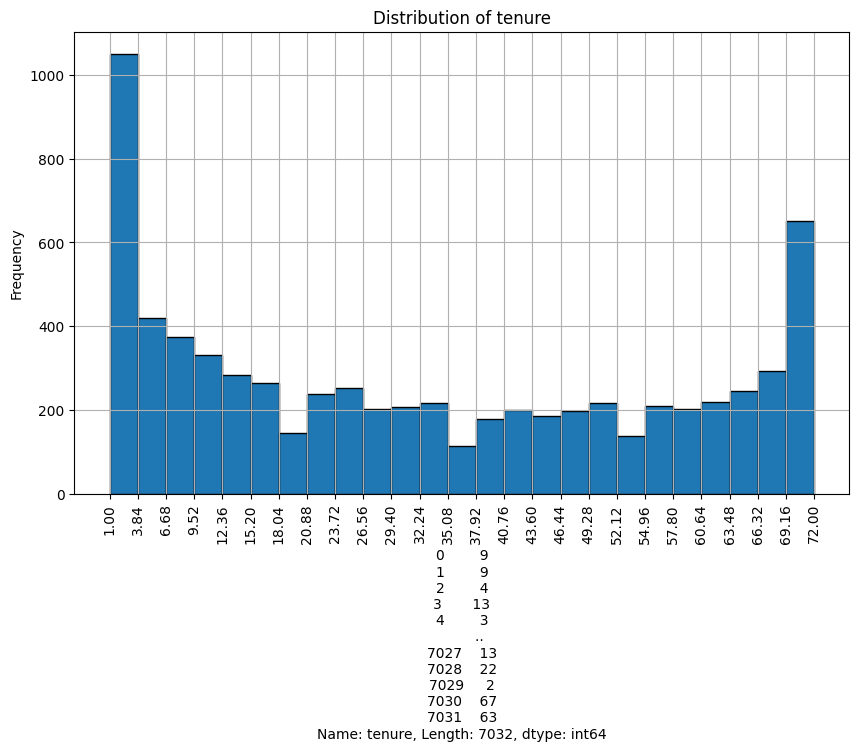

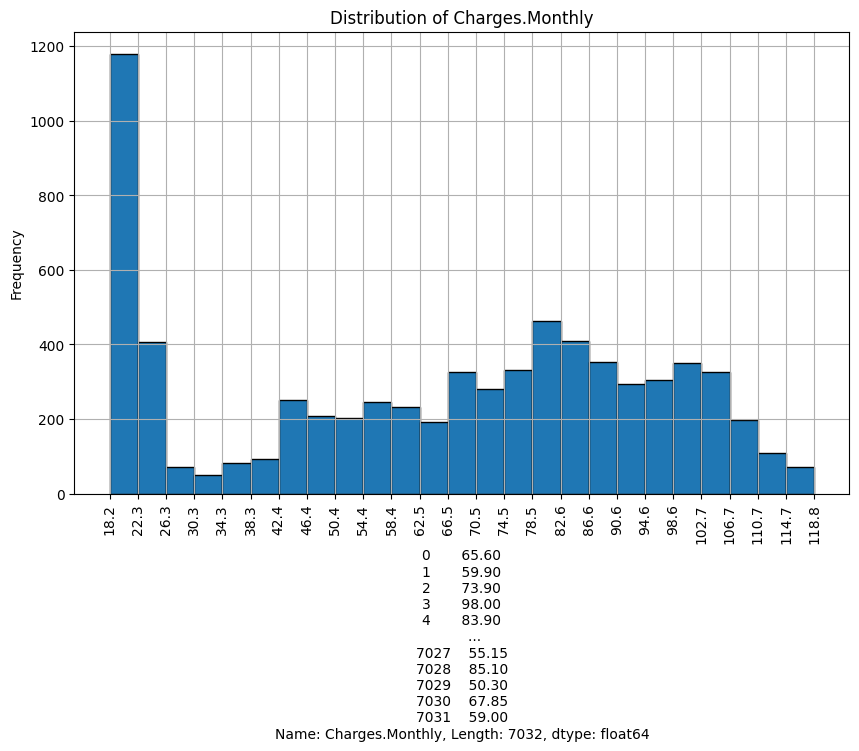

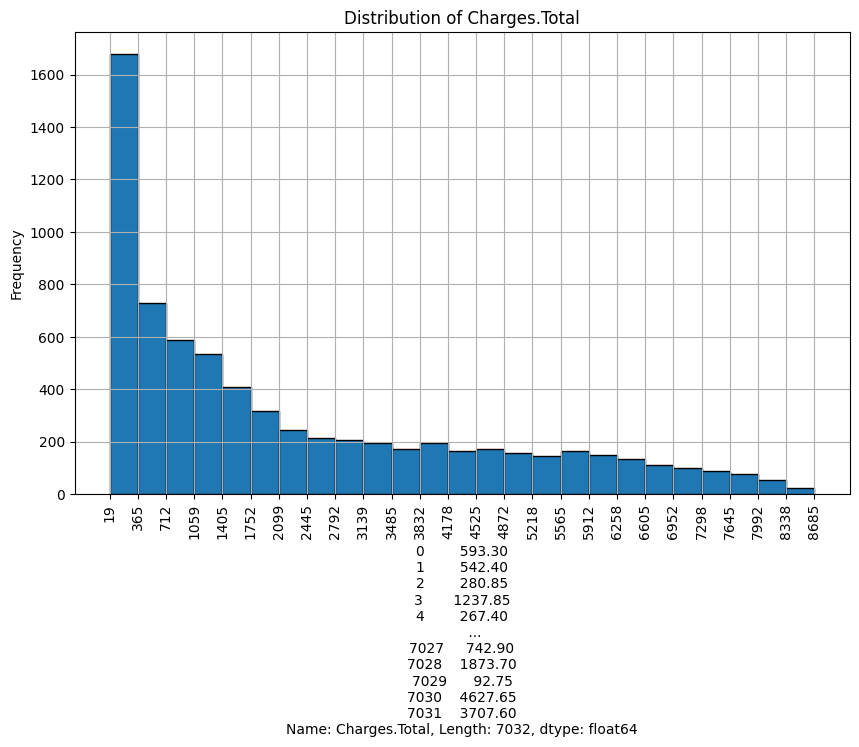

In [55]:
### Gonna check the histograms for these variables

for column in numerical_columns:
    fig = get_hist(df, column, f"Distribution of {column}", bins = 25)
    plt.xticks(rotation=90)
    fig.show()

In [64]:
### Checking the percentage of client who has less than 27 monthly charges
percentage = len(df[df["Charges.Monthly"] < 27])/len(df) * 100
print("Percentage of clients with less than 27 monthly charges: {:.2f}%".format(percentage))

Percentage of clients with less than 27 monthly charges: 22.75%


In [61]:
### Checking the percentage of client who has less than 7 months of tenure

num = df["tenure"].value_counts(normalize=True).sort_index().head(6).sum() * 100
print("Percentage of clients with less than 7 months of tenure: {:.2f}%".format(num))

Percentage of clients with less than 7 months of tenure: 20.90%


In fact, the numerical data is mostly right-skewed. A few other conclusions we can draw just by looking at the histogram are:

- In our sample, 22.75% of the clients pay less than 27 "moneys" (I will assume the currency is BRL from now on) per month for the Alura Voz service;
- In the sample, 20.9% of the clients have less than 7 months of tenure;
- As expected, since many clients pay little or have a short tenure in our sample, the total charges are highly right-skewed.


In [70]:
### Checking if the price raises over time or the monthly charges are constant

df["Charges_per_month"] = df["Charges.Total"]/df["tenure"]
df[["Charges.Monthly", "Charges_per_month", "tenure", "Charges.Total"]].head()

,Charges.Monthly,Charges_per_month,tenure,Charges.Total
0,65.6,65.922222,9,593.30
1,59.9,60.266667,9,542.40
2,73.9,70.212500,4,280.85
3,98.0,95.219231,13,1237.85
4,83.9,89.133333,3,267.40


In [73]:
### Are the charges per month and the monthly charges statistically different?

ttest_ind(df["Charges.Monthly"], df["Charges_per_month"], equal_var=False) ### They are in fact equal, so for now on i will think the monthly charges are constant

TtestResult(statistic=np.float64(-0.0023913442171334003), pvalue=np.float64(0.99809201910976), df=np.float64(14061.845422545575))

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_2900\3009963072.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  get_scatter_plot(df, "tenure", "Charges.Monthly", "Tenure x Monthly Charges").show()


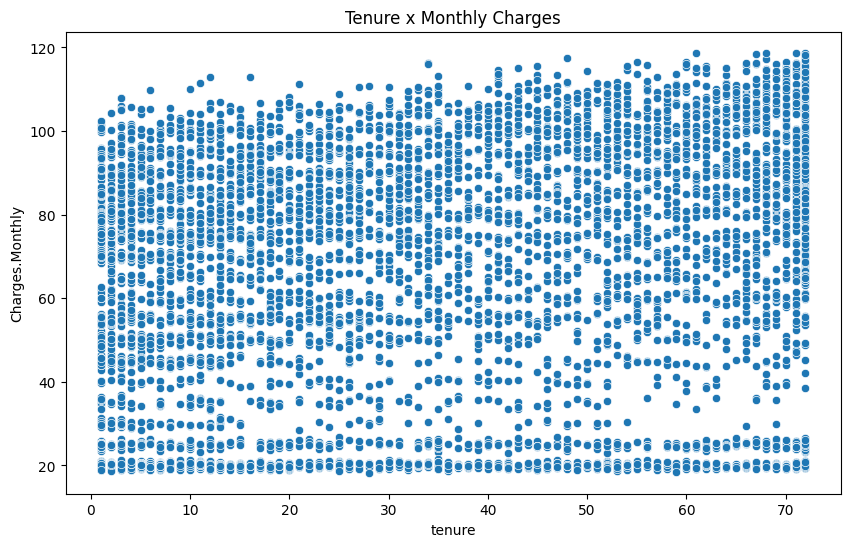

In [ ]:
### I do want to know more about the tenure and Charges.Montly relationship

get_scatter_plot(df, "tenure", "Charges.Monthly", "Tenure x Monthly Charges").show() ### What a mess

In [79]:
sturges_rule = lambda n: int(np.ceil(1 + 10/3* np.log10(n)))
sturges_rule(len(df)) ### Checking the number of bins to compare the charges and the tenure

In [90]:
tenure_interval_index = pd.value_counts(
    pd.cut(
        df["tenure"], bins = sturges_rule(len(df)), include_lowest= True
    )
).sort_index().index.categories
df["tenure_interval"] = pd.cut(df["tenure"], bins = tenure_interval_index, include_lowest= True)
charges_index = pd.value_counts(
    pd.cut(
        df["Charges.Monthly"], bins = sturges_rule(len(df)), include_lowest= True
    )
).sort_index().index.categories
df["charges_interval"] = pd.cut(df["Charges.Monthly"], bins = charges_index, include_lowest= True)
df.head()

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_2900\3617190266.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tenure_interval_index = pd.value_counts(
C:\Users\Leonardo\AppData\Local\Temp\ipykernel_2900\3617190266.py:7: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  charges_index = pd.value_counts(


,gender,SeniorCitizen,Partner,Dependents,tenure,customerID,Churn,PhoneService,MultipleLines,InternetService,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Churn_encoded,Charges_per_month,tenure_interval,charges_interval
0,Female,No,Yes,Yes,9,0002-ORFBO,No,Yes,No,DSL,...,No,One year,Yes,Mailed check,65.6,593.30,0,65.922222,"(6.071, 11.143]","(61.321, 68.5]"
1,Male,No,No,No,9,0003-MKNFE,No,Yes,Yes,DSL,...,Yes,Month-to-month,No,Mailed check,59.9,542.40,0,60.266667,"(6.071, 11.143]","(54.143, 61.321]"
2,Male,No,No,No,4,0004-TLHLJ,Yes,Yes,No,Fiber optic,...,No,Month-to-month,Yes,Electronic check,73.9,280.85,1,70.212500,"(0.928, 6.071]","(68.5, 75.679]"
3,Male,Yes,Yes,No,13,0011-IGKFF,Yes,Yes,No,Fiber optic,...,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,1,95.219231,"(11.143, 16.214]","(97.214, 104.393]"
4,Female,Yes,Yes,No,3,0013-EXCHZ,Yes,Yes,No,Fiber optic,...,No,Month-to-month,Yes,Mailed check,83.9,267.40,1,89.133333,"(0.928, 6.071]","(82.857, 90.036]"


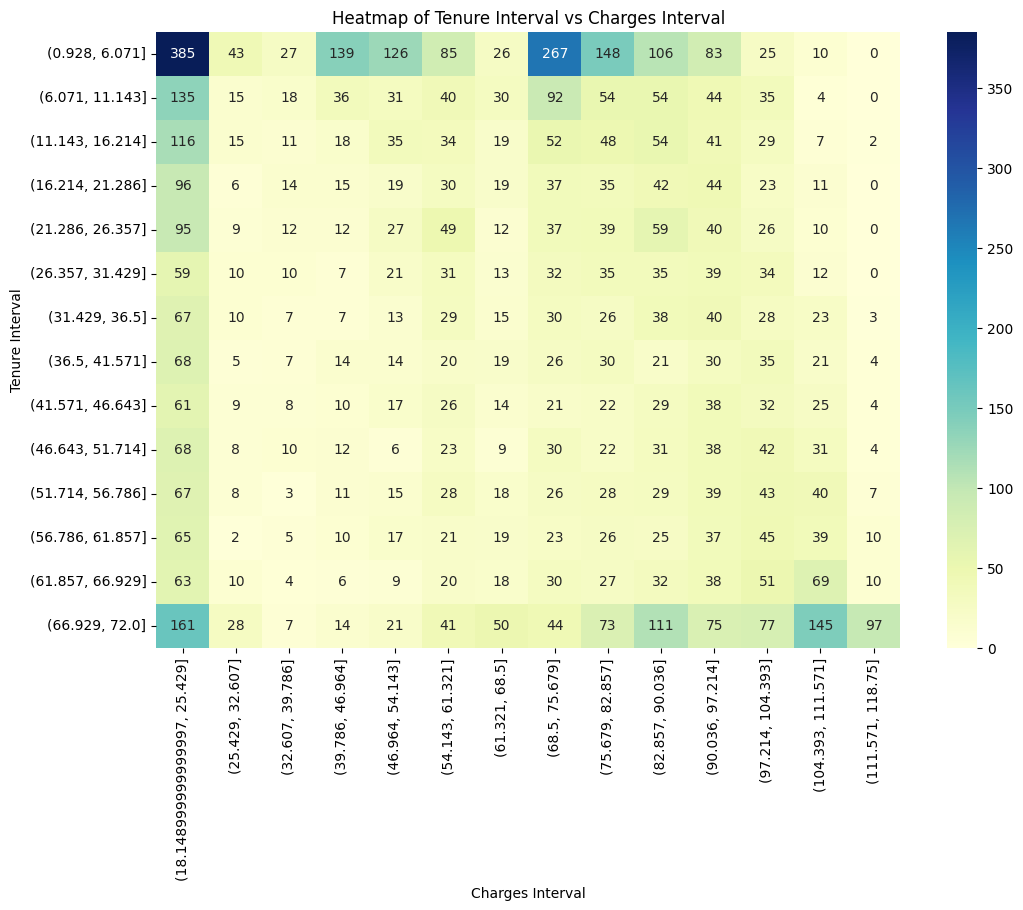

In [ ]:
heatmap_data = pd.crosstab(df['tenure_interval'], df['charges_interval'])

### Draw heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap='YlGnBu', cbar=True)

# Set labels
plt.title('Heatmap of Tenure Interval vs Charges Interval')
plt.xlabel('Charges Interval')
plt.ylabel('Tenure Interval')

plt.show()